In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import RUSBoostClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import preprocessing
from pathlib import Path
from sklearn import datasets, metrics, model_selection, svm
from sklearn.utils import resample
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in

In [5]:
# Call data
data = pd.read_csv(r"X:\Lab Members\Sung\SYSHIN0228\RERC_STARS_Sensor_Analysis\Machine_Learning_6MWT\Feature_Matrix_Prediction_6MWT.csv", sep=',')
data = data.dropna() 

CM = np.zeros((2,2))
W_F1 = np.zeros((7,10))
Accuracy = np.zeros((7,10))
BAccuracy = np.zeros((7,10))
roc_auc = np.zeros((7,10))
correct_number = np.zeros((7,10))


CoT = 0
# Feature input
for feature_input in range(7):
    # Cut off time
    for n in [10, 20, 30, 60, 90, 120, 180, 240, 300, 360]:
        df = data.query('cut_off_time == @n')
        
        # Feature input
        # Demo + CO + AoM + Gyr + Acc
        if feature_input == 0:
            
            df_feature = df[[
                # Demographics
                'Age', 'SexM0F1', 'Height', 'Weight',
                # Clinical outcomes at admission
#                 'FIM_AD', 'BBS_AD', 'MWT10_SSV_AD', 'MWT6_AD', 'TUG_AD',
                # Amount of motion
                'AoM_Pel_tilt', 'AoM_Pel_oblq', 'AoM_Pel_ro', 'AoM_Pel_norm',
                'AoM_Ankle_US_x', 'AoM_Ankle_US_y', 'AoM_Ankle_US_z', 'AoM_Ankle_US_norm',
                'AoM_Ankle_AS_x', 'AoM_Ankle_AS_y', 'AoM_Ankle_AS_z', 'AoM_Ankle_AS_norm',
                # Signal characteristics of Gyroscope
                'SC_Gyr_norm_mean', 'DLS_R_Gyr_norm_mean', 'DLS_L_Gyr_norm_mean',
                'SC_Gyr_norm_range', 'DLS_R_Gyr_norm_range', 'DLS_L_Gyr_norm_range',
                'SC_Gyr_norm_rms', 'DLS_R_Gyr_norm_rms', 'DLS_L_Gyr_norm_rms',
                'SC_Gyr_norm_std', 'DLS_R_Gyr_norm_std', 'DLS_L_Gyr_norm_std',
                'SC_Gyr_norm_skew', 'DLS_R_Gyr_norm_skew', 'DLS_L_Gyr_norm_skew',
                'SC_Gyr_norm_kurtosis', 'DLS_R_Gyr_norm_kurtosis', 'DLS_L_Gyr_norm_kurtosis',
                'SC_Gyr_norm_SamEn', 'DLS_R_Gyr_norm_SamEn', 'DLS_L_Gyr_norm_SamEn',
                # Signal characteristics of acceleration
                'SC_Acc_norm_mean', 'DLS_R_Acc_norm_mean', 'DLS_L_Acc_norm_mean',
                'SC_Acc_norm_range', 'DLS_R_Acc_norm_range', 'DLS_L_Acc_norm_range',
                'SC_Acc_norm_rms', 'DLS_R_Acc_norm_rms', 'DLS_L_Acc_norm_rms',
                'SC_Acc_norm_std', 'DLS_R_Acc_norm_std', 'DLS_L_Acc_norm_std',
                'SC_Acc_norm_skew', 'DLS_R_Acc_norm_skew', 'DLS_L_Acc_norm_skew',
                'SC_Acc_norm_kurtosis', 'DLS_R_Acc_norm_kurtosis', 'DLS_L_Acc_norm_kurtosis',
                'SC_Acc_norm_SamEn', 'DLS_R_Acc_norm_SamEn', 'DLS_L_Acc_norm_SamEn'
                        ]]
            X = df_feature.values
            
        # Demo + CO + AoM    
        elif feature_input == 1:
            
            df_feature = df[[
                # Demographics
                'Age', 'SexM0F1', 'Height', 'Weight',
                # Clinical outcomes at admission
#                 'FIM_AD', 'BBS_AD', 'MWT10_SSV_AD', 'MWT6_AD', 'TUG_AD',
                # Amount of motion
                'AoM_Pel_tilt', 'AoM_Pel_oblq', 'AoM_Pel_ro', 'AoM_Pel_norm',
                'AoM_Ankle_US_x', 'AoM_Ankle_US_y', 'AoM_Ankle_US_z', 'AoM_Ankle_US_norm',
                'AoM_Ankle_AS_x', 'AoM_Ankle_AS_y', 'AoM_Ankle_AS_z', 'AoM_Ankle_AS_norm'
                        ]]
            X = df_feature.values
            
        # Demo + CO + Gyr
        elif feature_input == 2:
                        
            df_feature = df[[
                # Demographics
                'Age', 'SexM0F1', 'Height', 'Weight',
                # Clinical outcomes at admission
#                 'FIM_AD', 'BBS_AD', 'MWT10_SSV_AD', 'MWT6_AD', 'TUG_AD',
                # Signal characteristics of Gyroscope
                'SC_Gyr_norm_mean', 'DLS_R_Gyr_norm_mean', 'DLS_L_Gyr_norm_mean',
                'SC_Gyr_norm_range', 'DLS_R_Gyr_norm_range', 'DLS_L_Gyr_norm_range',
                'SC_Gyr_norm_rms', 'DLS_R_Gyr_norm_rms', 'DLS_L_Gyr_norm_rms',
                'SC_Gyr_norm_std', 'DLS_R_Gyr_norm_std', 'DLS_L_Gyr_norm_std',
                'SC_Gyr_norm_skew', 'DLS_R_Gyr_norm_skew', 'DLS_L_Gyr_norm_skew',
                'SC_Gyr_norm_kurtosis', 'DLS_R_Gyr_norm_kurtosis', 'DLS_L_Gyr_norm_kurtosis',
                'SC_Gyr_norm_SamEn', 'DLS_R_Gyr_norm_SamEn', 'DLS_L_Gyr_norm_SamEn'
                        ]]
            X = df_feature.values
            
        # Demo + CO + Acc
        elif feature_input == 3:
                        
            df_feature = df[[
                # Demographics
                'Age', 'SexM0F1', 'Height', 'Weight',
                # Clinical outcomes at admission
#                 'FIM_AD', 'BBS_AD', 'MWT10_SSV_AD', 'MWT6_AD', 'TUG_AD',
                # Signal characteristics of acceleration
                'SC_Acc_norm_mean', 'DLS_R_Acc_norm_mean', 'DLS_L_Acc_norm_mean',
                'SC_Acc_norm_range', 'DLS_R_Acc_norm_range', 'DLS_L_Acc_norm_range',
                'SC_Acc_norm_rms', 'DLS_R_Acc_norm_rms', 'DLS_L_Acc_norm_rms',
                'SC_Acc_norm_std', 'DLS_R_Acc_norm_std', 'DLS_L_Acc_norm_std',
                'SC_Acc_norm_skew', 'DLS_R_Acc_norm_skew', 'DLS_L_Acc_norm_skew',
                'SC_Acc_norm_kurtosis', 'DLS_R_Acc_norm_kurtosis', 'DLS_L_Acc_norm_kurtosis',
                'SC_Acc_norm_SamEn', 'DLS_R_Acc_norm_SamEn', 'DLS_L_Acc_norm_SamEn'
                        ]]
            X = df_feature.values
            
        # Demo + CO + AoM + Gyr
        if feature_input == 4:
            
            df_feature = df[[
                # Demographics
                'Age', 'SexM0F1', 'Height', 'Weight',
                # Clinical outcomes at admission
#                 'FIM_AD', 'BBS_AD', 'MWT10_SSV_AD', 'MWT6_AD', 'TUG_AD',
                # Amount of motion
                'AoM_Pel_tilt', 'AoM_Pel_oblq', 'AoM_Pel_ro', 'AoM_Pel_norm',
                'AoM_Ankle_US_x', 'AoM_Ankle_US_y', 'AoM_Ankle_US_z', 'AoM_Ankle_US_norm',
                'AoM_Ankle_AS_x', 'AoM_Ankle_AS_y', 'AoM_Ankle_AS_z', 'AoM_Ankle_AS_norm',
                # Signal characteristics of Gyroscope
                'SC_Gyr_norm_mean', 'DLS_R_Gyr_norm_mean', 'DLS_L_Gyr_norm_mean',
                'SC_Gyr_norm_range', 'DLS_R_Gyr_norm_range', 'DLS_L_Gyr_norm_range',
                'SC_Gyr_norm_rms', 'DLS_R_Gyr_norm_rms', 'DLS_L_Gyr_norm_rms',
                'SC_Gyr_norm_std', 'DLS_R_Gyr_norm_std', 'DLS_L_Gyr_norm_std',
                'SC_Gyr_norm_skew', 'DLS_R_Gyr_norm_skew', 'DLS_L_Gyr_norm_skew',
                'SC_Gyr_norm_kurtosis', 'DLS_R_Gyr_norm_kurtosis', 'DLS_L_Gyr_norm_kurtosis',
                'SC_Gyr_norm_SamEn', 'DLS_R_Gyr_norm_SamEn', 'DLS_L_Gyr_norm_SamEn'
                        ]]
            X = df_feature.values
            
        # Demo + CO + AoM + Acc
        if feature_input == 5:
            
            df_feature = df[[
                # Demographics
                'Age', 'SexM0F1', 'Height', 'Weight',
                # Clinical outcomes at admission
#                 'FIM_AD', 'BBS_AD', 'MWT10_SSV_AD', 'MWT6_AD', 'TUG_AD',
                # Amount of motion
                'AoM_Pel_tilt', 'AoM_Pel_oblq', 'AoM_Pel_ro', 'AoM_Pel_norm',
                'AoM_Ankle_US_x', 'AoM_Ankle_US_y', 'AoM_Ankle_US_z', 'AoM_Ankle_US_norm',
                'AoM_Ankle_AS_x', 'AoM_Ankle_AS_y', 'AoM_Ankle_AS_z', 'AoM_Ankle_AS_norm',
                # Signal characteristics of acceleration
                'SC_Acc_norm_mean', 'DLS_R_Acc_norm_mean', 'DLS_L_Acc_norm_mean',
                'SC_Acc_norm_range', 'DLS_R_Acc_norm_range', 'DLS_L_Acc_norm_range',
                'SC_Acc_norm_rms', 'DLS_R_Acc_norm_rms', 'DLS_L_Acc_norm_rms',
                'SC_Acc_norm_std', 'DLS_R_Acc_norm_std', 'DLS_L_Acc_norm_std',
                'SC_Acc_norm_skew', 'DLS_R_Acc_norm_skew', 'DLS_L_Acc_norm_skew',
                'SC_Acc_norm_kurtosis', 'DLS_R_Acc_norm_kurtosis', 'DLS_L_Acc_norm_kurtosis',
                'SC_Acc_norm_SamEn', 'DLS_R_Acc_norm_SamEn', 'DLS_L_Acc_norm_SamEn'
                        ]]
            X = df_feature.values
            
        # Demo + CO + Gyr + Acc
        if feature_input == 6:
            
            df_feature = df[[
                # Demographics
                'Age', 'SexM0F1', 'Height', 'Weight',
                # Clinical outcomes at admission
#                 'FIM_AD', 'BBS_AD', 'MWT10_SSV_AD', 'MWT6_AD', 'TUG_AD',
                # Signal characteristics of Gyroscope
                'SC_Gyr_norm_mean', 'DLS_R_Gyr_norm_mean', 'DLS_L_Gyr_norm_mean',
                'SC_Gyr_norm_range', 'DLS_R_Gyr_norm_range', 'DLS_L_Gyr_norm_range',
                'SC_Gyr_norm_rms', 'DLS_R_Gyr_norm_rms', 'DLS_L_Gyr_norm_rms',
                'SC_Gyr_norm_std', 'DLS_R_Gyr_norm_std', 'DLS_L_Gyr_norm_std',
                'SC_Gyr_norm_skew', 'DLS_R_Gyr_norm_skew', 'DLS_L_Gyr_norm_skew',
                'SC_Gyr_norm_kurtosis', 'DLS_R_Gyr_norm_kurtosis', 'DLS_L_Gyr_norm_kurtosis',
                'SC_Gyr_norm_SamEn', 'DLS_R_Gyr_norm_SamEn', 'DLS_L_Gyr_norm_SamEn',
                # Signal characteristics of acceleration
                'SC_Acc_norm_mean', 'DLS_R_Acc_norm_mean', 'DLS_L_Acc_norm_mean',
                'SC_Acc_norm_range', 'DLS_R_Acc_norm_range', 'DLS_L_Acc_norm_range',
                'SC_Acc_norm_rms', 'DLS_R_Acc_norm_rms', 'DLS_L_Acc_norm_rms',
                'SC_Acc_norm_std', 'DLS_R_Acc_norm_std', 'DLS_L_Acc_norm_std',
                'SC_Acc_norm_skew', 'DLS_R_Acc_norm_skew', 'DLS_L_Acc_norm_skew',
                'SC_Acc_norm_kurtosis', 'DLS_R_Acc_norm_kurtosis', 'DLS_L_Acc_norm_kurtosis',
                'SC_Acc_norm_SamEn', 'DLS_R_Acc_norm_SamEn', 'DLS_L_Acc_norm_SamEn'
                        ]]
            X = df_feature.values
            
        
        
        # To combine Moderate and Mild at Admission
        k = 0
        for i in df['Ambul_AD']:
            if i == 'Moderate':
                df['Ambul_AD'].values[k] = 'Mild'
            k+=1

        # To combine Moderate and Mild at Discharge
        k = 0
        for i in df['Ambul_DC']:
            if i == 'Moderate':
                df['Ambul_DC'].values[k] = 'Mild'

#             print('ID', k+1, ', AD: ', df['Ambul_AD'].values[k], ', DC: ', df['Ambul_DC'].values[k])
            k+=1

        factor = pd.factorize(df['Ambul_DC'])
        df.Ambul_DC = factor[0]
        definitions = factor[1]
#         print(df.Ambul_DC)

        # Normalize features
        min_max_scaler = preprocessing.MinMaxScaler()
        X_scale = min_max_scaler.fit_transform(X)
        y = df['Ambul_DC'].values
        
        # Leave-one-subject-out cross validation
        loo = LeaveOneOut()
        loo.get_n_splits(X)
        
        i = 0
        y_test_ = np.zeros((len(y)))
        y_pred_ = np.zeros((len(y)))
        y_probs_ = np.zeros((len(y),2))

        correct = 0
        incorrect = 0
        for train_index, test_index in loo.split(X):
#             print("TRAIN:", train_index, "TEST:", test_index)
            X_train, X_test = X_scale[train_index], X_scale[test_index]
            y_train, y_test = y[train_index], y[test_index]
        
            # Machine learning models
        
#             clf = AdaBoostClassifier(random_state=123)
#             clf = BaggingClassifier(random_state=123)
#             clf = BalancedBaggingClassifier(random_state=123)
#             clf = RandomForestClassifier(n_estimators=100)
#             clf = BalancedRandomForestClassifier(n_estimators=100, random_state=123, bootstrap=False)
            clf = RUSBoostClassifier(random_state=123)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            
            y_test_[i] = y_test
            y_pred_[i] = y_pred
            y_probs_[i] = clf.predict_proba(X_test)
            
            reversefactor = dict(zip(range(2),definitions))
            y_test = np.vectorize(reversefactor.get)(y_test)
            y_pred = np.vectorize(reversefactor.get)(y_pred)
            
            if y_test == ['Mild'] and y_pred == ['Mild']:
                CM[0][0] += 1
            elif y_test == ['Mild'] and y_pred == ['Severe']:
                CM[0][1] += 1
            elif y_test == ['Severe'] and y_pred == ['Severe']:
                CM[1][1] += 1
            elif y_test == ['Severe'] and y_pred == ['Mild']:
                CM[1][0] += 1
                
            if y_test == y_pred:
                correct = correct + 1
            else:
                incorrect = incorrect + 1
            
            i = i+1
#             print('Iteration:', i)
            
        print('Correct:', correct)
        print('Incorrect:', incorrect)
        
        target_names = ['Mild', 'Severe']
        print(confusion_matrix(y_test_, y_pred_))
        print(classification_report(y_test_, y_pred_, target_names = target_names))
    
        W_F1[feature_input][CoT] = metrics.f1_score(y_test_, y_pred_, average='weighted')
        Accuracy[feature_input][CoT] = metrics.accuracy_score(y_test_, y_pred_)
        BAccuracy[feature_input][CoT] = metrics.balanced_accuracy_score(y_test_, y_pred_)
        
        fpr, tpr, threshold = metrics.roc_curve(y_test_, y_probs_[:,1])
        roc_auc[feature_input][CoT] = metrics.auc(fpr, tpr)
        correct_number[feature_input][CoT] = correct
        
        CoT += 1
    CoT = 0


    

Correct: 35
Incorrect: 6
[[28  3]
 [ 3  7]]
              precision    recall  f1-score   support

        Mild       0.90      0.90      0.90        31
      Severe       0.70      0.70      0.70        10

    accuracy                           0.85        41
   macro avg       0.80      0.80      0.80        41
weighted avg       0.85      0.85      0.85        41

Correct: 35
Incorrect: 6
[[28  3]
 [ 3  7]]
              precision    recall  f1-score   support

        Mild       0.90      0.90      0.90        31
      Severe       0.70      0.70      0.70        10

    accuracy                           0.85        41
   macro avg       0.80      0.80      0.80        41
weighted avg       0.85      0.85      0.85        41

Correct: 32
Incorrect: 9
[[26  5]
 [ 4  6]]
              precision    recall  f1-score   support

        Mild       0.87      0.84      0.85        31
      Severe       0.55      0.60      0.57        10

    accuracy                           0.78       

Correct: 37
Incorrect: 4
[[29  2]
 [ 2  8]]
              precision    recall  f1-score   support

        Mild       0.94      0.94      0.94        31
      Severe       0.80      0.80      0.80        10

    accuracy                           0.90        41
   macro avg       0.87      0.87      0.87        41
weighted avg       0.90      0.90      0.90        41

Correct: 33
Incorrect: 8
[[26  5]
 [ 3  7]]
              precision    recall  f1-score   support

        Mild       0.90      0.84      0.87        31
      Severe       0.58      0.70      0.64        10

    accuracy                           0.80        41
   macro avg       0.74      0.77      0.75        41
weighted avg       0.82      0.80      0.81        41

Correct: 31
Incorrect: 10
[[27  4]
 [ 6  4]]
              precision    recall  f1-score   support

        Mild       0.82      0.87      0.84        31
      Severe       0.50      0.40      0.44        10

    accuracy                           0.76      

Correct: 33
Incorrect: 8
[[25  6]
 [ 2  8]]
              precision    recall  f1-score   support

        Mild       0.93      0.81      0.86        31
      Severe       0.57      0.80      0.67        10

    accuracy                           0.80        41
   macro avg       0.75      0.80      0.76        41
weighted avg       0.84      0.80      0.81        41

Correct: 31
Incorrect: 10
[[26  5]
 [ 5  5]]
              precision    recall  f1-score   support

        Mild       0.84      0.84      0.84        31
      Severe       0.50      0.50      0.50        10

    accuracy                           0.76        41
   macro avg       0.67      0.67      0.67        41
weighted avg       0.76      0.76      0.76        41

Correct: 33
Incorrect: 8
[[26  5]
 [ 3  7]]
              precision    recall  f1-score   support

        Mild       0.90      0.84      0.87        31
      Severe       0.58      0.70      0.64        10

    accuracy                           0.80      

Correct: 32
Incorrect: 9
[[27  4]
 [ 5  5]]
              precision    recall  f1-score   support

        Mild       0.84      0.87      0.86        31
      Severe       0.56      0.50      0.53        10

    accuracy                           0.78        41
   macro avg       0.70      0.69      0.69        41
weighted avg       0.77      0.78      0.78        41



   W_F1_All  W_F1_AoM  W_F1_Gyr  W_F1_Acc  W_F1_AoMGyr  W_F1_AoMAcc  \
0  0.804878  0.814410  0.882902  0.633878     0.814410     0.742384   
1  0.836062  0.814410  0.816939  0.816939     0.814410     0.836062   
2  0.814410  0.810495  0.860807  0.814410     0.857871     0.836062   
3  0.860807  0.814410  0.838853  0.814410     0.857871     0.831934   
4  0.838853  0.836062  0.838853  0.814410     0.860807     0.836062   
5  0.814410  0.838853  0.838853  0.814410     0.860807     0.860807   
6  0.789223  0.838853  0.838853  0.742384     0.836062     0.816939   
7  0.836062  0.814410  0.838853  0.763119     0.814410     0.814410   
8  0.836062  0.838853  0.814410  0.792811     0.768012     0.814410   
9  0.794974  0.860807  0.768012  0.836062     0.768012     0.836062   

   W_F1_GyrAcc  Accuracy_All  Accuracy_AoM  Accuracy_Gyr  ...  \
0     0.792811      0.804878      0.804878      0.878049  ...   
1     0.814410      0.829268      0.804878      0.804878  ...   
2     0.836062      0.8

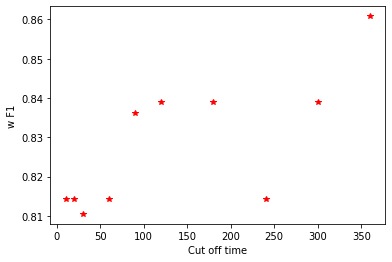

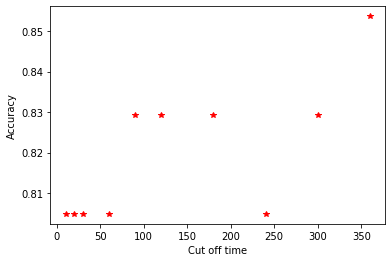

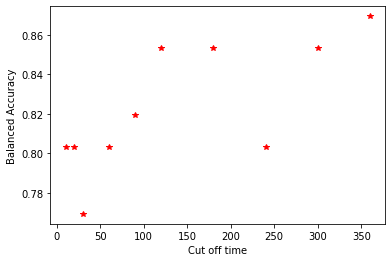

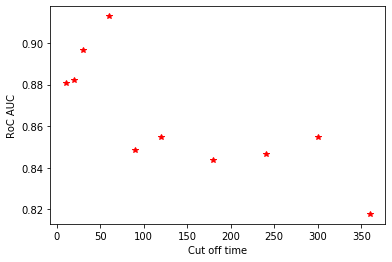

In [4]:
Eval_save = pd.DataFrame({'W_F1_All': W_F1[0], 'W_F1_AoM': W_F1[1], 'W_F1_Gyr': W_F1[2], 'W_F1_Acc': W_F1[3], 'W_F1_AoMGyr': W_F1[4], 'W_F1_AoMAcc': W_F1[5], 'W_F1_GyrAcc': W_F1[6], 
                        'Accuracy_All': Accuracy[0], 'Accuracy_AoM': Accuracy[1], 'Accuracy_Gyr': Accuracy[2], 'Accuracy_Acc': Accuracy[3], 'Accuracy_AoMGyr': Accuracy[4], 'Accuracy_AoMAcc': Accuracy[5], 'Accuracy_GyrAcc': Accuracy[6], 
                        'BAccuracy_All': BAccuracy[0], 'BAccuracy_AoM': BAccuracy[1], 'BAccuracy_Gyr': BAccuracy[2], 'BAccuracy_Acc': BAccuracy[3], 'BAccuracy_AoMGyr': BAccuracy[4], 'BAccuracy_AoMAcc': BAccuracy[5], 'BAccuracy_GyrAcc': BAccuracy[6], 
                        'AUC_All': roc_auc[0], 'AUC_AoM': roc_auc[1], 'AUC_Gyr': roc_auc[2], 'AUC_Acc': roc_auc[3], 'AUC_AoMGyr': roc_auc[4], 'AUC_AoMAcc': roc_auc[5], 'AUC_GyrAcc': roc_auc[6]
                       })
print(Eval_save)
SAVEPATH = Path(r"X:\Lab Members\Sung\SYSHIN0228\RERC_STARS_Sensor_Analysis\Machine_Learning_6MWT")
# Eval_save.to_csv(SAVEPATH/'Eval_BalancedBaggingClassifier_noCO.csv', index=False) 



CoT = [10, 20, 30, 60, 90, 120, 180, 240, 300, 360]
j = 1
plt.plot(CoT,W_F1[j],'r*')
plt.xlabel('Cut off time')
plt.ylabel('w F1')
plt.show()

plt.plot(CoT,Accuracy[j],'r*')
plt.xlabel('Cut off time')
plt.ylabel('Accuracy')
plt.show()

plt.plot(CoT,BAccuracy[j],'r*')
plt.xlabel('Cut off time')
plt.ylabel('Balanced Accuracy')
plt.show()

plt.plot(CoT,roc_auc[j],'r*')
plt.xlabel('Cut off time')
plt.ylabel('RoC AUC')
plt.show()


In [127]:
print(W_F1[0])





[0.81693916 0.81693916 0.83885323 0.8608074  0.81693916 0.81693916
 0.79497413 0.79497413 0.79497413 0.79497413]
